# Chapter 4 : Fundamentals of machine learning

[Book Link](https://github.com/fchollet/deep-learning-with-python-notebooks)

Four branches of machine learning :
1. **Supervised learning**  :‌ It consists of learning to map input data to known targets (also called annotations)

There are more exotic variants as well, including the following (with examples):
* Sequence generation—Given a picture, predict a caption describing it. Sequence generation can sometimes be reformulated as a series of classification problems (such as repeatedly predicting a word or token in a sequence).
* Syntax tree prediction—Given a sentence, predict its decomposition into a syntax tree.
+Object detection—Given a picture, draw a bounding box around certain objects inside the picture. This can also be expressed as a classification problem (given many candidate bounding boxes, classify the contents of each one) or as a joint classification and regression problem, where the bounding-box coordinates are predicted via vector regression.
* Image segmentation—Given a picture, draw a pixel-level mask on a specific object

2. **Unsupervised learning:** This branch of machine learning consists of finding interesting transformations of the input data without the help of any targets, for the purposes of data visualization, data compression, or data denoising, or to better understand the correlations present in the data at hand.
Dimensionality reduction and clustering are well-known categories of unsupervised learning.
3. **Self-supervised learning:** For instance, autoencoders are a well-known instance of self-supervised learning, where the generated targets are the input, unmodified.
4. **Reinforcement learning:** For instance, a neural network that “looks” at a videogame screen and outputs game actions in order to maximize its score can be trained via reinforcement learning.

**Classification and regression glossary**

 *Classification and regression involve many specialized terms. You’ve come across
some of them in earlier examples, and you’ll see more of them in future chapters.
They have precise, machine-learning-specific definitions, and you should be familiar
with them:*

 Sample or input—One data point that goes into your model.

 Prediction or output—What comes out of your model.

 Target—The truth. What your model should ideally have predicted, according to an external source of data.

 Prediction error or loss value—A measure of the distance between your
model’s prediction and the target.

 Classes—A set of possible labels to choose from in a classification problem. For example, when classifying cat and dog pictures, “dog” and “cat” are the two classes.

 Label—A specific instance of a class annotation in a classification problem. For instance, if picture #1234 is annotated as containing the class “dog,” then “dog” is a label of picture #1234.

 Ground-truth or annotations—All targets for a dataset, typically collected by humans.

 Binary classification—A classification task where each input sample should be categorized into two exclusive categories.

 Multiclass classification—A classification task where each input sample should be categorized into more than two categories: for instance, classifying handwritten digits.

 Multilabel classification—A classification task where each input sample can be assigned multiple labels. For instance, a given image may contain both a cat and a dog and should be annotated both with the “cat” label and the “dog” label. The number of labels per image is usually variable.

 Scalar regression—A task where the target is a continuous scalar value. Predicting house prices is a good example: the different target prices form a continuous space.

 Vector regression—A task where the target is a set of continuous values: for example, a continuous vector. If you’re doing regression against multiple values (such as the coordinates of a bounding box in an image), then you’re doing vector regression.

 Mini-batch or batch—A small set of samples (typically between 8 and 128) that are processed simultaneously by the model. The number of samples is often a power of 2, to facilitate memory allocation on GPU. When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model.

# Training, validation, and test sets :

**Evaluating a model always boils down to splitting the available data into three sets:**

training, validation, and test. You train on the training data and evaluate your model
on the validation data. Once your model is ready for prime time, you test it one final
time on the test data.

**why not have two sets: a training set and a test set?**

a model always involves tuning its configuration: for example, choosing the number of layers or the size of the layers (called the hyperparameters of the model, to distinguish them from the parameters, which are the network’s weights). 

You do this tuning by using as a feedback signal the performance of the model on the validation data. In essence, this tuning is a form of learning: a search for a good configuration in some parameter space. 

As a result, tuning the configuration of the model based on its performance on the validation set can quickly result in overfitting to the validation set, even though your model is never directly trained on it.

**Keep an eye out for the following when you’re choosing an evaluation protocol:**

 Data representativeness—You want both your training set and test set to be representative of the data at hand. For instance, if you’re trying to classify images of digits, and you’re starting from an array of samples where the samples are ordered by their class, taking the first 80% of the array as your training set and the remaining 20% as your test set will result in your training set containing only classes 0–7, whereas your test set contains only classes 8–9. This seems like a ridiculous mistake, but it’s surprisingly common. For this reason, you usually should randomly shuffle your data before splitting it into training and test sets.

 The arrow of time—If you’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), you should not randomly shuffle your data before splitting it, because doing so will create a temporal leak: your model will effectively be trained on data from the future. In such situations, you should always make sure all data in your test set is posterior to the data in the training set.

 Redundancy in your data—If some data points in your data appear twice (fairly
common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, you’ll be testing on part of your training data, which is the worst thing you can do! Make sure your training set and validation set are disjoint.



# Data preprocessing for neural networks:
1. VECTORIZATION
2. VALUE NORMALIZATION
3. Handing missing value

**your data should have the following characteristics:**

 Take small values—Typically, most values should be in the 0–1 range.

 Be homogenous—That is, all features should take values in roughly the same
range  Feature engineering: Feature engineering is the process of using your own knowledge about the data and about the machine-learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying hardcoded (nonlearned) transformations to the data before it goes into the model.

**Result of good feature engineering:**
1.  Good features still allow you to solve problems more elegantly while using fewer
resources. For instance, it would be ridiculous to solve the problem of reading a
clock face using a convolutional neural network.
2.  Good features let you solve a problem with far less data. The ability of deeplearning models to learn features on their own relies on having lots of training
data available; if you have only a few samples, then the information value in
their features becomes critical.


In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# Overfitting and underfitting

Learning how to deal with overfitting is essential to mastering machine learning.

The fundamental issue in machine learning is the tension between optimization and generalization. 
**"Optimization"** refers to the process of  adjusting a model to get the best performance possible on the training data (the "learning" in "machine learning"), 

**"generalization"** 
refers to how well the trained model would perform on data it has never seen before. The goal of the game is to get good generalization, of course, but you do not control generalization; you can only adjust the model based on its training data.

At the beginning of training, optimization and generalization are correlated: the lower your loss on training data, the lower your loss on 
test data. While this is happening, your model is said to be _under-fit_: there is still progress to be made; the network hasn't yet 
modeled all relevant patterns in the training data. But after a certain number of iterations on the training data, generalization stops 
improving, validation metrics stall then start degrading: the model is then starting to over-fit, i.e. is it starting to learn patterns 
that are specific to the training data but that are misleading or irrelevant when it comes to new data.

To prevent a model from learning misleading or irrelevant patterns found in the training data, _the best solution is of course to get 
more training data_. A model trained on more data will naturally generalize better. When that is no longer possible, the next best solution 
is to modulate the quantity of information that your model is allowed to store, or to add constraints on what information it is allowed to 
store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most 
prominent patterns, which have a better chance of generalizing well.

**_regularization_** : The processing of fighting overfitting in this way is called _regularization_. 

Note: in this notebook we will be using the IMDB test set as our validation set. It doesn't matter in this context.

Let's prepare the data using the code from Chapter 3, Section 5:

In [0]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 2s 0us/step


# Fighting overfitting

## Reducing the network's size


The simplest way to prevent overfitting is to **reduce the size of the model, i.e. the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer)**. 
In deep learning, the number of learnable parameters in a model is 
often referred to as the model's "capacity". 

Intuitively, a model with more parameters will have more "memorization capacity" and therefore 
will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any 
generalization power. For instance, a model with 500,000 binary parameters could easily be made to learn the class of every digits in the  MNIST training set: we would only need 10 binary parameters for each of the 50,000 digits. Such a model would be useless for classifying 
new digit samples. 

**Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge  is generalization, not fitting.**

On the other hand, if the network has limited memorization resources, it will not be able to learn this mapping as easily, and thus, in 
order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets 
-- precisely the type of representations that we are interested in. At the same time, keep in mind that you should be using models that have 
enough parameters that they won't be underfitting: your model shouldn't be starved for memorization resources. 

There is a compromise to be  found between **"too much capacity"** and **"not enough capacity"**.

Unfortunately, there is no magical formula to determine what the right number of layers is, or what the right size for each layer is. You 
will have to evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the 
right model size for your data. The general workflow to find an appropriate model size is to start with relatively few layers and 
parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the 
validation loss.

Let's try this on our movie review classification network. Our original network was as such:

In [0]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now let's try to replace it with this smaller network:

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

In [0]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.4723 - acc: 0.8193 - val_loss: 0.3541 - val_acc: 0.8784
Epoch 2/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.2731 - acc: 0.9071 - val_loss: 0.2869 - val_acc: 0.8898
Epoch 3/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.2061 - acc: 0.9251 - val_loss: 0.2907 - val_acc: 0.8833
Epoch 4/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.1708 - acc: 0.9382 - val_loss: 0.2989 - val_acc: 0.8826
Epoch 5/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.1482 - acc: 0.9478 - val_loss: 0.3080 - val_acc: 0.8796
Epoch 6/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.1300 - acc: 0.9560 - val_loss: 0.3219 - val_acc: 0.8780
Epoch 7/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.1131 - acc: 0.9614 - val_loss: 0.3437 - 

In [0]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.5319 - acc: 0.8006 - val_loss: 0.4346 - val_acc: 0.8677
Epoch 2/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.3507 - acc: 0.8954 - val_loss: 0.3421 - val_acc: 0.8806
Epoch 3/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.2676 - acc: 0.9160 - val_loss: 0.3008 - val_acc: 0.8890
Epoch 4/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.2218 - acc: 0.9273 - val_loss: 0.2850 - val_acc: 0.8896
Epoch 5/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.1926 - acc: 0.9359 - val_loss: 0.2803 - val_acc: 0.8889
Epoch 6/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.1723 - acc: 0.9419 - val_loss: 0.2837 - val_acc: 0.8870
Epoch 7/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.1554 - acc: 0.9492 - val_loss: 0.2886 - va

In [0]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

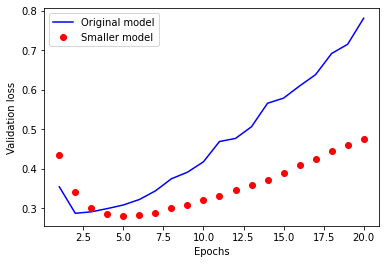

In [0]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b-', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'ro', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance 
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [0]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 17s 668us/step - loss: 0.4573 - acc: 0.7970 - val_loss: 0.2980 - val_acc: 0.8794
Epoch 2/20
25000/25000 [==============================] - 17s 666us/step - loss: 0.2207 - acc: 0.9145 - val_loss: 0.2807 - val_acc: 0.8868
Epoch 3/20
25000/25000 [==============================] - 17s 665us/step - loss: 0.1322 - acc: 0.9505 - val_loss: 0.3065 - val_acc: 0.8839
Epoch 4/20
25000/25000 [==============================] - 17s 665us/step - loss: 0.0604 - acc: 0.9826 - val_loss: 0.4437 - val_acc: 0.8819
Epoch 5/20
25000/25000 [==============================] - 17s 664us/step - loss: 0.0735 - acc: 0.9877 - val_loss: 0.4858 - val_acc: 0.8812
Epoch 6/20
25000/25000 [==============================] - 17s 667us/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.7191 - val_acc: 0.8795
Epoch 7/20
25000/25000 [==============================] - 17s 666us/step - loss: 0.1249 - acc: 0.9873 - val_loss: 0.

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the 
crosses are the initial network.

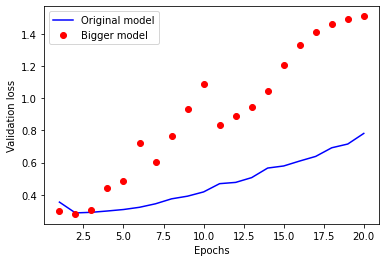

In [0]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b-', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'ro', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

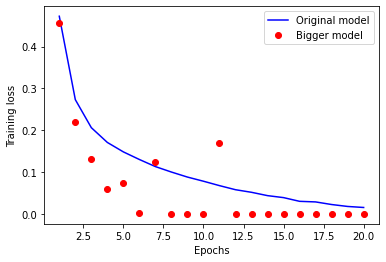

In [0]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b-', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'ro', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

## Adding weight regularization


You may be familiar with _Occam's Razor_ principle: given two explanations for something, the explanation most likely to be correct is the 
"simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some 
training data and a network architecture, there are multiple sets of weights values (multiple _models_) that could explain the data, and 
simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer 
parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity 
of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called 
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This 
cost comes in two flavors:

* **L1 regularization**: where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the "L1 norm" of the weights).
* **L2 regularization**: where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called 
the "L2 norm" of the weights). L2 regularization is also called **_weight decay_** in the context of neural networks. 

*Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.*

In Keras, weight regularization is added by passing **_weight regularizer instances_** to layers as keyword arguments. Let's add L2 weight 
regularization to our movie review classification network:

In [0]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of 
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training 
than at test time.

Here's the impact of our L2 regularization penalty:

In [0]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.4922 - acc: 0.8233 - val_loss: 0.3921 - val_acc: 0.8695
Epoch 2/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.3153 - acc: 0.9051 - val_loss: 0.3401 - val_acc: 0.8860
Epoch 3/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.2742 - acc: 0.9215 - val_loss: 0.3321 - val_acc: 0.8895
Epoch 4/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.2518 - acc: 0.9283 - val_loss: 0.3415 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.2405 - acc: 0.9323 - val_loss: 0.3961 - val_acc: 0.8649
Epoch 6/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2328 - acc: 0.9356 - val_loss: 0.3892 - val_acc: 0.8694
Epoch 7/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2269 - acc: 0.9396 - val_loss: 0.4204 - 

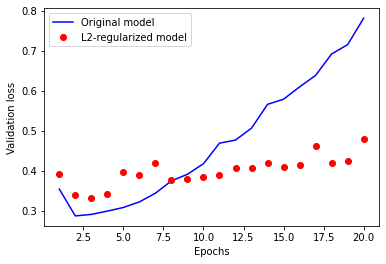

In [0]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b-', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'ro', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [0]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout We Are Here


Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his 
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of 
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a 
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5, 
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test 
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to 
balance for the fact that more units are active than at training time.

Consider a Numpy matrix containing the output of a layer, `layer_output`, of shape `(batch_size, features)`. At training time, we would be 
zero-ing out at random a fraction of the values in the matrix:

# At training time: we drop out 50% of the units in the output
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)


At test time, we would be scaling the output down by the dropout rate. Here we scale by 0.5 (because we were previous dropping half the 
units):

In [0]:
# At test time:
# layer_output *= 0.5


Note that this process can be implemented by doing both operations at training time and leaving the output unchanged at test time, which is 
often the way it is implemented in practice:

In [0]:
# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5

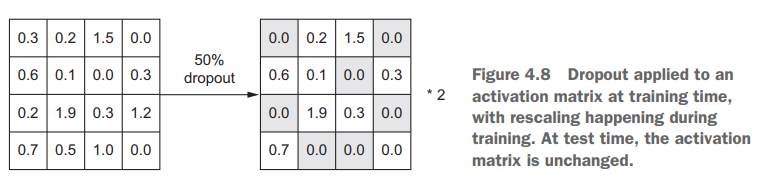

In [1]:
from IPython.display import *
Image(filename='./image/dropout.png')


This technique may seem strange and arbitrary. Why would this help reduce overfitting? Geoff Hinton has said that he was inspired, among 
other things, by a fraud prevention mechanism used by banks -- in his own words: _"I went to my bank. The tellers kept changing and I asked 
one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation 
between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each 
example would prevent conspiracies and thus reduce overfitting"_.

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what 
Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present. 

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:

In [0]:
# model.add(layers.Dropout(0.5))

Let's add two `Dropout` layers in our IMDB network to see how well they do at reducing overfitting:

In [0]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [0]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.6118 - acc: 0.6638 - val_loss: 0.4845 - val_acc: 0.8620
Epoch 2/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.4720 - acc: 0.7910 - val_loss: 0.3686 - val_acc: 0.8807
Epoch 3/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.3903 - acc: 0.8482 - val_loss: 0.3140 - val_acc: 0.8871
Epoch 4/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.3320 - acc: 0.8800 - val_loss: 0.2857 - val_acc: 0.8886
Epoch 5/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2919 - acc: 0.8968 - val_loss: 0.2814 - val_acc: 0.8891
Epoch 6/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2606 - acc: 0.9105 - val_loss: 0.2891 - val_acc: 0.8883
Epoch 7/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.2312 - acc: 0.9189 - val_loss: 0.2976 - 

Let's plot the results:

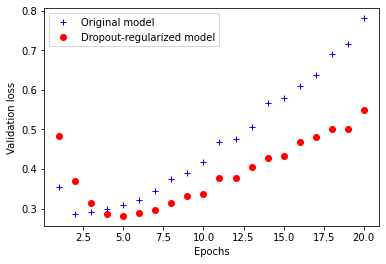

In [0]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'ro', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

# To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

**Be aware of the hypotheses:**

 You hypothesize that your outputs can be predicted given your inputs.

 You hypothesize that your available data is sufficiently informative to learn the
relationship between inputs and outputs

`Not all problems can be solved;` just because you’ve assembled examples of inputs X and targets Y doesn’t mean X contains enough information to predict Y. 

Keep in mind that machine learning can only be used to memorize patterns that
are present in your training data. 

* For `balanced-classification problems`, where every class is equally likely, accuracy and
area under the receiver operating characteristic curve (ROC AUC) are common metrics. 

**In general, you can hope that the lower the crossentropy gets, the higher the ROC AUC will be.**

* For `class-imbalanced problems`, you can use precision and recall. 

* For `ranking problems or multilabel classification`, you can use mean average precision. 



**Three layers of building model:**

 **Last-layer activation**—This establishes useful constraints on the network’s output. For instance, the IMDB classification example used sigmoid in the last
layer; the regression example didn’t use any last-layer activation; and so on.

 **Loss function**—This should match the type of problem you’re trying to solve. For
instance, the IMDB example used binary_crossentropy, the regression example used mse, and so on.

 **Optimization configuration**—What optimizer will you use? What will its learning
rate be? In most cases, it’s safe to go with rmsprop and its default learning rate

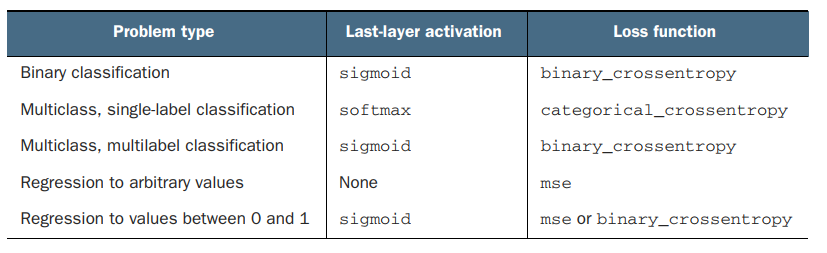

In [2]:
Image(filename="./image/activation_loss_function.png")

To figure out how big a model you’ll need, you must develop a model that overfits.
This is fairly easy:
1. Add layers.
2. Make the layers bigger.
3. Train for more epochs

Always monitor the training loss and validation loss, as well as the training and validation values for any metrics you care about.

**These are some things you should try until the model is as good as it can get:**

 Add dropout.

 Try different architectures: add or remove layers.

 Add L1 and/or L2 regularization

 Try different hyperparameters (such as the number of units per layer or the
learning rate of the optimizer) to find the optimal configuration.

 Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative

# Chapter summary

 Define the problem at hand and the data on which you’ll train. Collect
this data, or annotate it with labels if need be.

 Choose how you’ll measure success on your problem. Which metrics will
you monitor on your validation data?

 Determine your evaluation protocol: hold-out validation? K-fold validation? Which portion of the data should you use for validation?

 Develop a first model that does better than a basic baseline: a model with
statistical power.

 Develop a model that overfits.

 Regularize your model and tune its hyperparameters, based on performance on the validation data. A lot of machine-learning research tends to
focus only on this step—but keep the big picture in mind